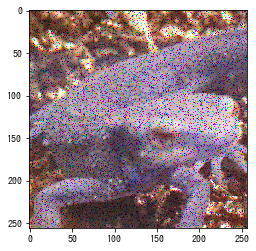

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_noise = cv2.imread("imori_256x256_noise.png")
plt.imshow(img_noise)

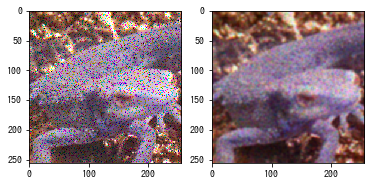

In [9]:
def filter_LoG(img, k_size=(3, 3), sigma=1.2):
    k = np.zeros(k_size, dtype=np.float)
    pad_x = k_size[0] // 2
    pad_y = k_size[1] // 2
    for x in range(-pad_y, -pad_y + k_size[1]):
        for y in range(-pad_x, -pad_x + k_size[0]):
            k[y + pad_y, x + pad_y] = (x ** 2 + y ** 2 - 2 * (sigma ** 2)) * np.exp(- (x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    k /= (2 * np.pi * (sigma ** 6))
    k /= k.sum()

    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min()
    out /= out.max()
    return out

img_log = filter_LoG(img_noise, k_size=(5, 5), sigma=3)

plt.subplot(1, 2, 1)
plt.imshow(img_noise, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(img_log, 'gray')
plt.show()

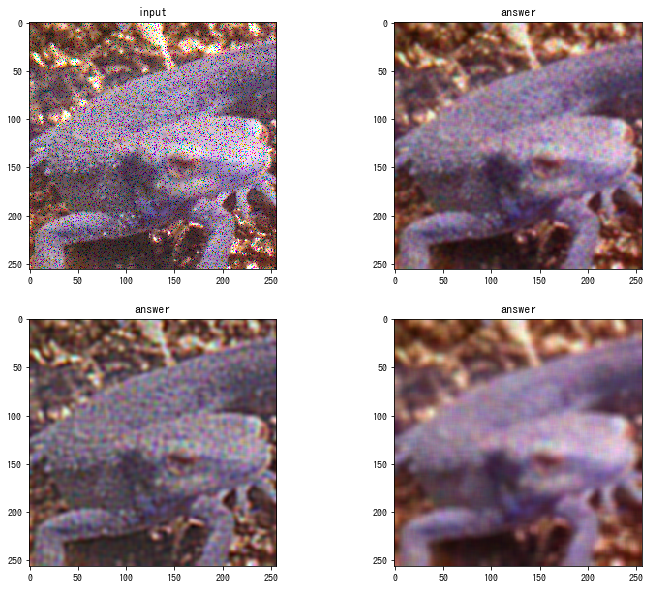

In [14]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1); plt.title('input'); plt.imshow(img_noise)

img_log = filter_LoG(img_noise, k_size=(5, 5), sigma=3)
plt.subplot(2, 2, 2); plt.title('answer'); plt.imshow(img_log)

img_log = filter_LoG(img_noise, k_size=(12, 12), sigma=3)
plt.subplot(2, 2, 3); plt.title('answer'); plt.imshow(img_log)

img_log = filter_LoG(img_noise, k_size=(9, 9), sigma=9)
plt.subplot(2, 2, 4); plt.title('answer'); plt.imshow(img_log)
plt.show()